In [113]:
import pandas as pd
import numpy as np

In [7]:
# 导入数据

In [116]:
df = pd.read_csv('rfm.csv')

In [117]:
df.head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,2,7,2866.77
1,12348.0,248,1,17.00
2,12349.0,18,1,1155.75
3,12350.0,310,1,274.00
4,12352.0,36,7,1147.44


In [11]:
# 导入相应包

In [118]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [8]:
# 确定数据源

In [119]:
X = df.iloc[:,1:]

In [121]:
X.head()

,Recency,Frequency,Monetary
0,2,7,2866.77
1,248,1,17.00
2,18,1,1155.75
3,310,1,274.00
4,36,7,1147.44


In [77]:
# 简单查看下如何创建模型

# 模型 = 算法 + 预处理后的数据

In [122]:
kmeans = KMeans(n_clusters=2,random_state=666,n_jobs=-1)

In [128]:
y_predict = kmeans.fit_predict(X)

In [129]:
silhouette_score(X,y_predict)

0.9727905413052251

In [124]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [125]:
kmeans.cluster_centers_

array([[9.27459745e+01, 3.87262677e+00, 8.82704240e+02],
       [2.50000000e+00, 1.03000000e+02, 4.30544575e+04]])

In [126]:
kmeans.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [13]:
# 创建学习曲线，查看查看轮廓系数,选择最合适的类别

In [15]:
# 用一个列表记录轮廓系数得分

In [130]:
s_list = []

In [17]:
# 不确定分成多少类，可先试下分成 2-20个类别，查看一下轮廓系数
# n_clusters
# random_state
# n_jobs

In [131]:
for i in range(2,21):
    k = KMeans(n_clusters=i,random_state=666,n_jobs=-1)
    y_predict = k.fit_predict(X)
    
    score = silhouette_score(X,y_predict)
    s_list.append(score)

In [86]:
# 绘制学习曲线
# 设置X轴间距
# from matplotlib.pyplot import MultipleLocator
# ax.xaxis.set_major_locator(MultipleLocator(1))

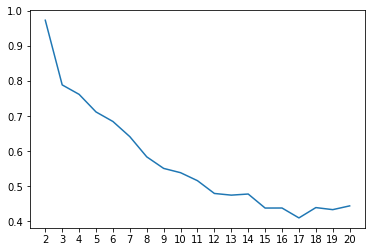

In [133]:
from matplotlib.pyplot import MultipleLocator

figure,ax = plt.subplots()


ax.plot(range(2,21),s_list)
ax.xaxis.set_major_locator(MultipleLocator(1))


In [93]:
# 继续寻找，在2-5之间，寻找最优得分

In [137]:
s_list = []

for i in range(2,6):
    k = KMeans(n_clusters=i,random_state=666,n_jobs=-1)
    y_predict = k.fit_predict(X)
    
    score = silhouette_score(X,y_predict)
    s_list.append(score)

In [97]:
# 从图示上看，最优的簇 是 2
# 不过一般而言，簇都会大于2，所以这里最优簇选择3

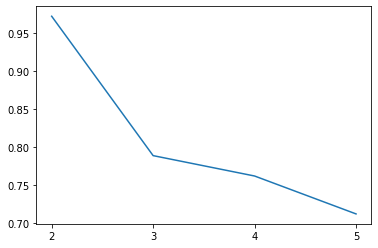

In [138]:
from matplotlib.pyplot import MultipleLocator

figure,ax = plt.subplots()


ax.plot(range(2,6),s_list)
ax.xaxis.set_major_locator(MultipleLocator(1))

In [ ]:
# # 用户簇类标签 
# labels_

In [139]:
k = KMeans(n_clusters=3,random_state=666,n_jobs=-1)

In [140]:
k.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=666, tol=0.0001, verbose=0)

In [141]:
k.labels_

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [143]:
df['cluster'] = k.labels_

In [144]:
df.head()

,CustomerID,Recency,Frequency,Monetary,cluster
0,12347.0,2,7,2866.77,2
1,12348.0,248,1,17.00,0
2,12349.0,18,1,1155.75,0
3,12350.0,310,1,274.00,0
4,12352.0,36,7,1147.44,0
